In [974]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [975]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [976]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [977]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [978]:
df.reset_index(drop=True,inplace=True)

In [979]:
df.drop(all_indices,axis=0,inplace= True)

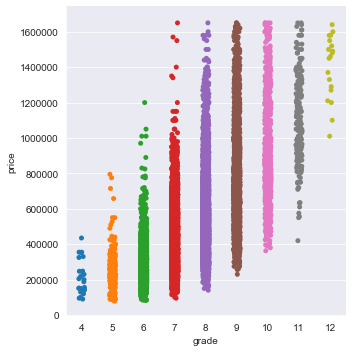

In [980]:
sns.catplot(x='grade',y='price',data=df,orient='v')

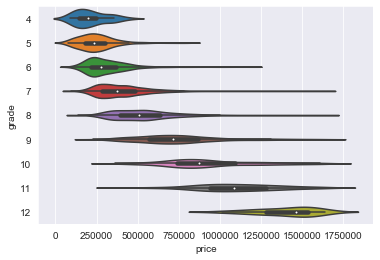

In [953]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [940]:
df['grade']

0        7
1        6
2        7
3        8
5        7
        ..
19216    8
19217    8
19218    8
19219    7
19220    7
Name: grade, Length: 18208, dtype: int64

In [941]:
df = df.round({'bathrooms':0})

In [770]:
# df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
# df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
# df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
# df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
# df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
# df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
# # df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
# df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)
# df['grade12'] = df.grade.apply(lambda x: 1 if x ==12 else 0)


In [942]:
df['garden'] = df['sqft_lot']-df['sqft_living']

In [943]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [944]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [945]:
for feat in tobox:
    df[feat],l= scs.boxcox(df[feat])

In [890]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [776]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [777]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [954]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','grade']


In [955]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [839]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [892]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [841]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [842]:
df['bedbath']=df['bedrooms']*df['bathrooms']

In [959]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','Years_last_renovation','distance_from_a_city',
           'basement']
outcome = ['price']

In [960]:
X = df[x_cols]
y = df['price']

In [961]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:51   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [962]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'Years_last_renovation']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-3.511e+04,4023.126,-8.728,0.0,-4.3e+04,-2.72e+04
bathrooms,-2.227e+04,5268.876,-4.227,0.0,-3.26e+04,-1.19e+04
sqft_living,1.33e+05,5157.299,25.781,0.0,1.23e+05,1.43e+05
sqft_lot,2.396e+04,3363.501,7.124,0.0,1.74e+04,3.06e+04
Years_last_renovation,-5.164e+04,4099.531,-12.597,0.0,-5.97e+04,-4.36e+04


In [963]:
X = df[x_cols]
y= df['price']

In [964]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:53   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [965]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.650668956766038),
 ('bathrooms', 2.8311881581495277),
 ('sqft_living', 2.712547471656192),
 ('sqft_lot', 1.1537607586998797),
 ('Years_last_renovation', 1.7139614711327327),
 ('distance_from_a_city', 1.2023133495734502),
 ('basement', 1.085102014883084)]

In [966]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

7 7


In [967]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:55   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [968]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:55   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

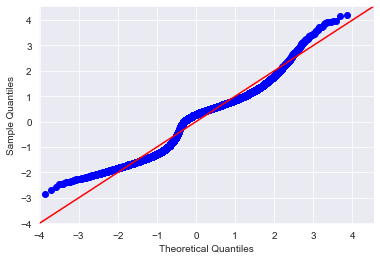

In [969]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


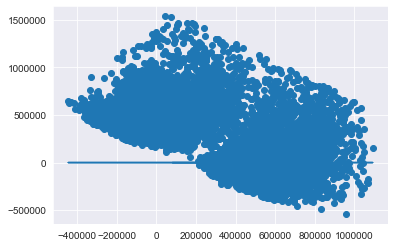

In [970]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

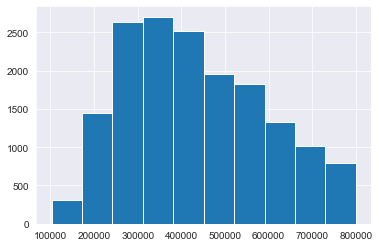

In [914]:
df.price.hist()

In [915]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 585000.0
0.81 percentile: 590000.0
0.82 percentile: 600000.0
0.83 percentile: 605000.0
0.84 percentile: 615000.0
0.85 percentile: 625000.0
0.86 percentile: 632500.0
0.87 percentile: 641150.0
0.88 percentile: 650000.0
0.89 percentile: 660000.0
0.9 percentile: 673000.0
0.91 percentile: 682000.0
0.92 percentile: 695000.0
0.93 percentile: 705000.0
0.94 percentile: 717525.0
0.95 percentile: 730000.0
0.96 percentile: 742500.0
0.97 percentile: 753000.0
0.98 percentile: 770000.0
0.99 percentile: 782000.0


In [916]:
orig_tot = len(df)
df = df[df.price < 1200000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.0


In [807]:
X = df[x_cols]
y = df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              3450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:02:10   Log-Likelihood:                     -2.5007e+05
No. Observations:               17712   AIC:                                  5.002e+05
Df Residuals:                   17704   BIC:                                  5.002e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.856e+04   3264.491    -11.813      0.000    -4.5e+04   -3.22e+04
bathrooms             -9725.7693   3522.109     -2.761      0.006   -1.66e+04   -2822.091
sqft_living            3.037e+04   4068.001      7.467      0.000    2.24e+04    3.83e+04
garden                -6273.4015   2594.115     -2.418      0.016   -1.14e+04   -1188.683
Years_last_renovation -3.632e+04   2895.376    -12.543      0.000    -4.2e+04   -3.06e+04
biggerliving           2.862e+05   5016.601     57.051      0.000    2.76e+05    2.96e+05
biggerlot              2.547e+05   4627.986     55.029      0.000    2.46e+05    2.64e+05
basement               2.651e+05   5040.821     52.590      0.000    2.55e+05    2.75e+05
==============================================================================
Omnibus:                       13.936   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.980
Skew:                           0.068   Prob(JB):                     0.000921
Kurtosis:                       2.974   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [808]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              3450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:02:11   Log-Likelihood:                     -2.5007e+05
No. Observations:               17712   AIC:                                  5.002e+05
Df Residuals:                   17704   BIC:                                  5.002e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.856e+04   3264.491    -11.813      0.000    -4.5e+04   -3.22e+04
bathrooms             -9725.7693   3522.109     -2.761      0.006   -1.66e+04   -2822.091
sqft_living            3.037e+04   4068.001      7.467      0.000    2.24e+04    3.83e+04
garden                -6273.4015   2594.115     -2.418      0.016   -1.14e+04   -1188.683
Years_last_renovation -3.632e+04   2895.376    -12.543      0.000    -4.2e+04   -3.06e+04
biggerliving           2.862e+05   5016.601     57.051      0.000    2.76e+05    2.96e+05
biggerlot              2.547e+05   4627.986     55.029      0.000    2.46e+05    2.64e+05
basement               2.651e+05   5040.821     52.590      0.000    2.55e+05    2.75e+05
==============================================================================
Omnibus:                       13.936   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.980
Skew:                           0.068   Prob(JB):                     0.000921
Kurtosis:                       2.974   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [809]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'garden', 'Years_last_renovation']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-3.856e+04,3264.491,-11.813,0.000,-4.5e+04,-3.22e+04
bathrooms,-9725.7693,3522.109,-2.761,0.006,-1.66e+04,-2822.091
sqft_living,3.037e+04,4068.001,7.467,0.000,2.24e+04,3.83e+04
garden,-6273.4015,2594.115,-2.418,0.016,-1.14e+04,-1188.683
Years_last_renovation,-3.632e+04,2895.376,-12.543,0.000,-4.2e+04,-3.06e+04


In [810]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              3450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:02:12   Log-Likelihood:                     -2.5007e+05
No. Observations:               17712   AIC:                                  5.002e+05
Df Residuals:                   17704   BIC:                                  5.002e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.856e+04   3264.491    -11.813      0.000    -4.5e+04   -3.22e+04
bathrooms             -9725.7693   3522.109     -2.761      0.006   -1.66e+04   -2822.091
sqft_living            3.037e+04   4068.001      7.467      0.000    2.24e+04    3.83e+04
garden                -6273.4015   2594.115     -2.418      0.016   -1.14e+04   -1188.683
Years_last_renovation -3.632e+04   2895.376    -12.543      0.000    -4.2e+04   -3.06e+04
biggerliving           2.862e+05   5016.601     57.051      0.000    2.76e+05    2.96e+05
biggerlot              2.547e+05   4627.986     55.029      0.000    2.46e+05    2.64e+05
basement               2.651e+05   5040.821     52.590      0.000    2.55e+05    2.75e+05
==============================================================================
Omnibus:                       13.936   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.980
Skew:                           0.068   Prob(JB):                     0.000921
Kurtosis:                       2.974   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [811]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7393473453803652),
 ('bathrooms', 1.9215959743586442),
 ('sqft_living', 2.602973322263972),
 ('garden', 1.1014930808349856),
 ('Years_last_renovation', 1.3726541993060744),
 ('biggerliving', 1.807480736522194),
 ('biggerlot', 1.3715583152228297),
 ('basement', 1.5744054285244502)]

In [812]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 8]
print(len(vif_scores), len(x_cols))

8 8


In [813]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              3450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:02:13   Log-Likelihood:                     -2.5007e+05
No. Observations:               17712   AIC:                                  5.002e+05
Df Residuals:                   17704   BIC:                                  5.002e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.856e+04   3264.491    -11.813      0.000    -4.5e+04   -3.22e+04
bathrooms             -9725.7693   3522.109     -2.761      0.006   -1.66e+04   -2822.091
sqft_living            3.037e+04   4068.001      7.467      0.000    2.24e+04    3.83e+04
garden                -6273.4015   2594.115     -2.418      0.016   -1.14e+04   -1188.683
Years_last_renovation -3.632e+04   2895.376    -12.543      0.000    -4.2e+04   -3.06e+04
biggerliving           2.862e+05   5016.601     57.051      0.000    2.76e+05    2.96e+05
biggerlot              2.547e+05   4627.986     55.029      0.000    2.46e+05    2.64e+05
basement               2.651e+05   5040.821     52.590      0.000    2.55e+05    2.75e+05
==============================================================================
Omnibus:                       13.936   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.980
Skew:                           0.068   Prob(JB):                     0.000921
Kurtosis:                       2.974   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

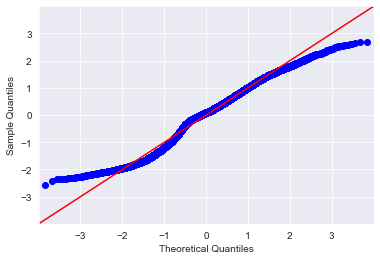

In [917]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


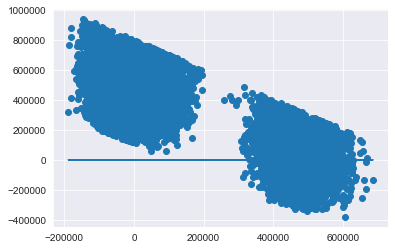

In [918]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 585000.0
0.81 percentile: 590000.0
0.82 percentile: 600000.0
0.83 percentile: 605000.0
0.84 percentile: 615000.0
0.85 percentile: 625000.0
0.86 percentile: 632500.0
0.87 percentile: 641150.0
0.88 percentile: 650000.0
0.89 percentile: 660000.0
0.9 percentile: 673000.0
0.91 percentile: 682000.0
0.92 percentile: 695000.0
0.93 percentile: 705000.0
0.94 percentile: 717525.0
0.95 percentile: 730000.0
0.96 percentile: 742500.0
0.97 percentile: 753000.0
0.98 percentile: 770000.0
0.99 percentile: 782000.0


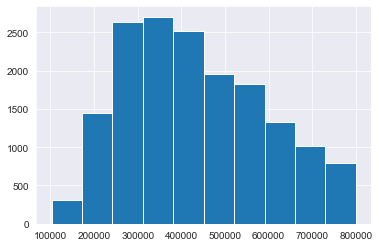

In [919]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [920]:
df = df[df.price <= 600000.0]


In [921]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.400
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              1517.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:28:20   Log-Likelihood:                     -1.9169e+05
No. Observations:               13638   AIC:                                  3.834e+05
Df Residuals:                   13632   BIC:                                  3.834e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               1171.5380   3668.531      0.319      0.749   -6019.289    8362.365
bathrooms             -9075.8592   4510.263     -2.012      0.044   -1.79e+04    -235.121
sqft_living           -7.612e+04   4705.821    -16.175      0.000   -8.53e+04   -6.69e+04
sqft_lot               3.681e+04   3072.462     11.979      0.000    3.08e+04    4.28e+04
Years_last_renovation -7.625e+04   3650.565    -20.886      0.000   -8.34e+04   -6.91e+04
basement               4.358e+05   4590.501     94.937      0.000    4.27e+05    4.45e+05
==============================================================================
Omnibus:                      326.261   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.011
Skew:                          -0.178   Prob(JB):                     9.17e-47
Kurtosis:                       2.504   Cond. No.                         3.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

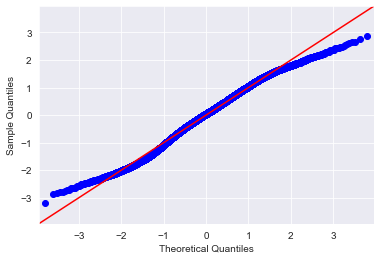

In [922]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


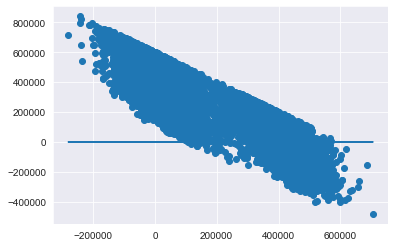

In [923]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [971]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [972]:
residuals = model.resid

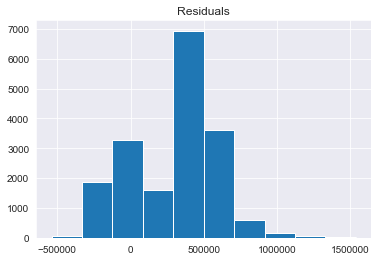

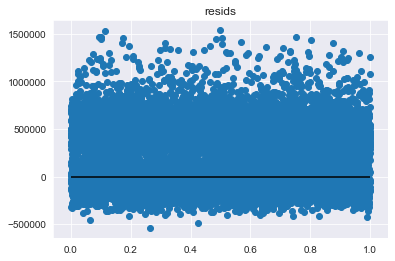

In [973]:
plot_residuals(residuals)

In [799]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [800]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [801]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(-0.991540067056303, -0.9940859499306182, -0.9709014130821849)

In [802]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-129817799802.025, -129580876054.84859, -127882311421.86694)

In [803]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-286167.5026916255, -285839.77588640957, -283598.0127359795)

In [804]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

-0.9438306425580624

In [552]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [553]:
make_ols_sklearn(X, y)

train R2 score = -0.9224752395047505
test R2 score = -0.939939788426028
cv5 R2 score = -0.9798757303993195
cv10 R2 score = -1.0089467047334408
cv5 MSE score = -79187970399.77225
cv10  MSE score = -79330962534.33836


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [554]:
make_ols_sklearn(X, y)

train R2 score = -0.9073640346172476
test R2 score = -0.9993862037341723
cv5 R2 score = -0.9798757303993195
cv10 R2 score = -1.0089467047334408
cv5 MSE score = -79187970399.77225
cv10  MSE score = -79330962534.33836


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [555]:
residuals = model.resid

In [556]:
resid = pd.DataFrame(df['price'])

In [557]:
resid['residuals']  = residuals

In [558]:
resid

,price,residuals
0,538000.0,133703.790521
1,180000.0,50742.939631
2,604000.0,262568.379496
3,510000.0,159771.394282
5,257500.0,289344.058607
...,...,...
19208,679950.0,81039.634172
19210,810000.0,188819.804016
19214,610685.0,426501.920783
19217,360000.0,230640.708717


In [559]:
import seaborn as sns

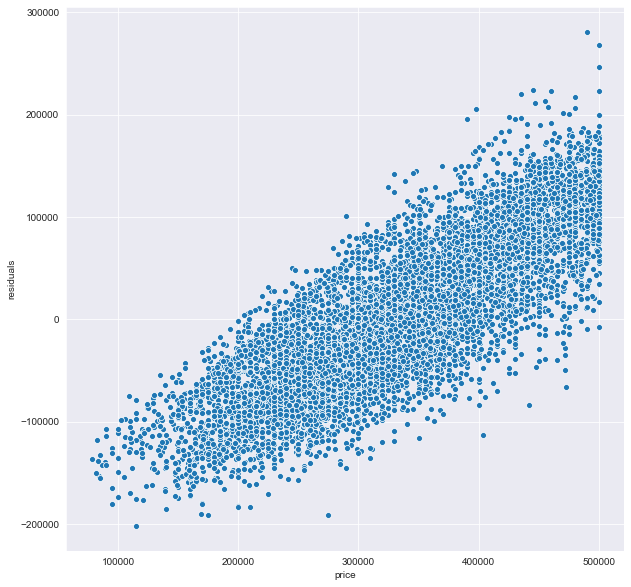

In [456]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [457]:
X_shuff, y_shuff = shuffle(X, y)

In [458]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.3096568656234185

In [459]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.3103922182736746

In [460]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.3110249148506133

In [461]:
ols = LinearRegression(fit_intercept=False,normalize=False)

In [462]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     298.3
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:01:43   Log-Likelihood:            -1.0644e+05
No. Observations:                8421   AIC:                         2.129e+05
Df Residuals:                    8407   BIC:                         2.130e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -6966.78

In [474]:
df1 = df[x_cols]

In [475]:
df1['price']=df['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [476]:
df1

,bedrooms,bathrooms,sqft_living,garden,Years_last_renovation,biggerliving,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,price
1,-1.711677,-1.533310,-1.624871,-0.107572,1.956136,0,0,0,1,0,0,0,0,0,0,180000.0
5,-0.465395,0.002799,-0.403238,-0.371250,-0.702687,0,0,0,0,1,0,0,0,0,0,257500.0
6,-0.465395,0.002799,-1.249979,-0.144574,0.669609,0,0,0,0,1,0,0,0,0,0,291850.0
7,-0.465395,-1.533310,-0.319210,-0.333801,0.798262,0,0,0,0,1,0,0,0,0,0,229500.0
8,-0.465395,0.002799,-0.177010,-0.398985,-1.045760,0,0,0,0,1,0,0,0,0,0,323000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,-0.465395,0.002799,-0.202864,-0.497401,-1.303066,0,0,0,0,1,0,0,0,0,0,270000.0
19200,-0.465395,0.002799,-0.655321,-0.699473,-1.174413,0,0,0,0,0,1,0,0,0,0,385000.0
19202,-0.465395,0.002799,0.663267,-0.555556,-1.345950,0,0,0,0,0,1,0,0,0,0,347500.0
19217,-0.465395,0.002799,-0.642394,-0.722926,-1.303066,0,0,0,0,0,1,0,0,0,0,360000.0


In [485]:
df[x_cols].columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'garden',
       'Years_last_renovation', 'biggerliving', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12'],
      dtype='object')

In [487]:
# def condition_data(x_sample):
#     for feat in x_sample.columns
#     x_sample['feat'] = norm_feat
#     return x_sample

def predict_price(x_sample):
    cols = ['bedrooms', 'bathrooms', 'sqft_living', 'garden',
       'Years_last_renovation', 'biggerliving', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12']
    target = 'price'
    x_sample_final = x_sample[cols]
    return ols.predict(x_sample_final)[0]

In [503]:
x_sample = df1.sample(n=1)
x_sample.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'garden',
       'Years_last_renovation', 'biggerliving', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'price'],
      dtype='object')

In [504]:
x_sample

,bedrooms,bathrooms,sqft_living,garden,Years_last_renovation,biggerliving,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,price
7808,-0.465395,0.002799,-0.642394,-0.239219,0.369419,0,0,0,0,1,0,0,0,0,0,235000.0


In [505]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [506]:
df1

,bedrooms,bathrooms,sqft_living,garden,Years_last_renovation,biggerliving,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,price
1,-1.711677,-1.533310,-1.624871,-0.107572,1.956136,0,0,0,1,0,0,0,0,0,0,180000.0
5,-0.465395,0.002799,-0.403238,-0.371250,-0.702687,0,0,0,0,1,0,0,0,0,0,257500.0
6,-0.465395,0.002799,-1.249979,-0.144574,0.669609,0,0,0,0,1,0,0,0,0,0,291850.0
7,-0.465395,-1.533310,-0.319210,-0.333801,0.798262,0,0,0,0,1,0,0,0,0,0,229500.0
8,-0.465395,0.002799,-0.177010,-0.398985,-1.045760,0,0,0,0,1,0,0,0,0,0,323000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,-0.465395,0.002799,-0.202864,-0.497401,-1.303066,0,0,0,0,1,0,0,0,0,0,270000.0
19200,-0.465395,0.002799,-0.655321,-0.699473,-1.174413,0,0,0,0,0,1,0,0,0,0,385000.0
19202,-0.465395,0.002799,0.663267,-0.555556,-1.345950,0,0,0,0,0,1,0,0,0,0,347500.0
19217,-0.465395,0.002799,-0.642394,-0.722926,-1.303066,0,0,0,0,0,1,0,0,0,0,360000.0


In [507]:
predict_price(x_sample)

320484.238181758